## 請使用 MLPClassfier 建立 iris 預測模型

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.data[0:3,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [4]:
iris.target[0:3]

array([0, 0, 0])

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X = sc.fit_transform(iris.data)

In [27]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier((5,5,),activation= 'relu', solver = 'adam', max_iter = 1000)
mlp.fit(scaled_X, iris.target)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

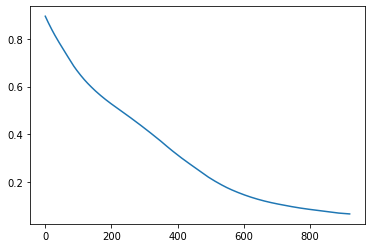

In [28]:
from matplotlib import pyplot as plt
plt.plot(range(len(mlp.loss_curve_)), mlp.loss_curve_)

In [29]:
predicted = mlp.predict(scaled_X)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(iris.target, predicted)

0.9666666666666667

In [31]:
confusion_matrix(iris.target, predicted)

array([[50,  0,  0],
       [ 0, 46,  4],
       [ 0,  1, 49]])

## Vanish Gradient

In [32]:
def sigmoid_function(x):
  return 1 / (1 +np.exp(-x))

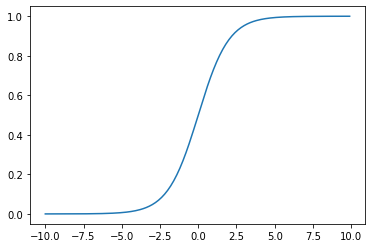

In [34]:
from matplotlib import pyplot as plt
import numpy as np
x = np.arange(-10,10,0.1)
y = sigmoid_function(x)
plt.plot(x,y)

In [35]:
def dfunc(f, x):
  h = 1e-4
  return (f(x+h) - f(x-h)) / (2*h)

In [37]:
d_y = dfunc(sigmoid_function,x )

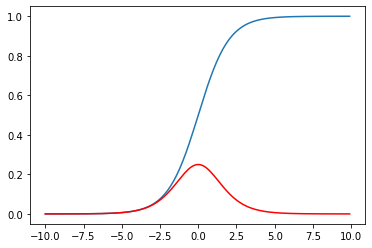

In [38]:
from matplotlib import pyplot as plt
import numpy as np
x = np.arange(-10,10,0.1)
y = sigmoid_function(x)
d_y = dfunc(sigmoid_function,x )
plt.plot(x,y)
plt.plot(x,d_y, c = 'red')

In [ ]:
#w = w - g*lr

## Suppoprt Vector Machine

In [40]:
X = iris.data[0:100:,[2,3]]
Y = iris.target[0:100]

In [43]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
clf1 = SVC(kernel = 'linear')
clf1.fit(X,Y)

clf2 = LogisticRegression()
clf2.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
def plot_estimator(estimator, X, y):
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
  np.arange(y_min, y_max, 0.1))
  Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.plot()
  plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.brg)
  plt.xlabel('Petal.Length')
  plt.ylabel('Petal.Width')
  plt.show()

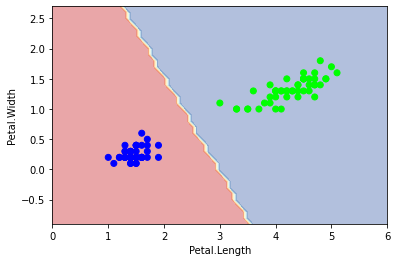

In [46]:
plot_estimator(clf1, X, Y)

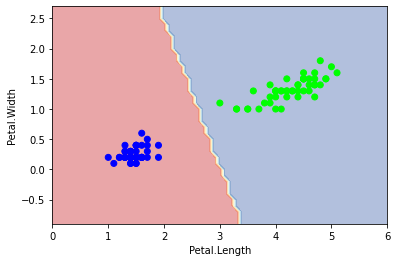

In [47]:
plot_estimator(clf2, X, Y)

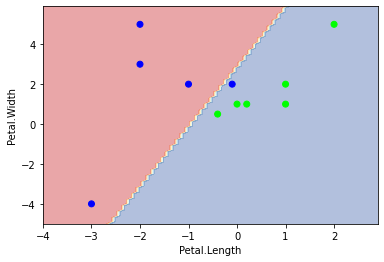

In [48]:
data = np.array([[-1,2,0],[-2,3,0],[-2,5,0],[-3,-4,0],[-0.1,2,0],[0.2,1,1],[0,1,1],[1,2,1], [1,1,1], [-
0.4,0.5,1],[2,5,1]])

X = data[:, :2]
Y = data[:,2]

# Large Margin
clf = SVC(C=1.0, kernel='linear')
clf.fit(X, Y)

plot_estimator(clf,X,Y)


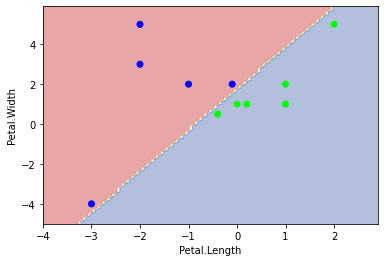

In [49]:
# Narrow Margin
clf = SVC(C=100000, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y)

In [58]:
iris = load_iris()
X = iris.data[:,[2,3]]
y = iris.target

In [65]:
clf1 = SVC(kernel="rbf", random_state = 123)
clf1.fit(X, y)

clf2 = SVC(kernel="poly")
clf2.fit(X, y)

clf3 = SVC(kernel="linear")
clf3.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

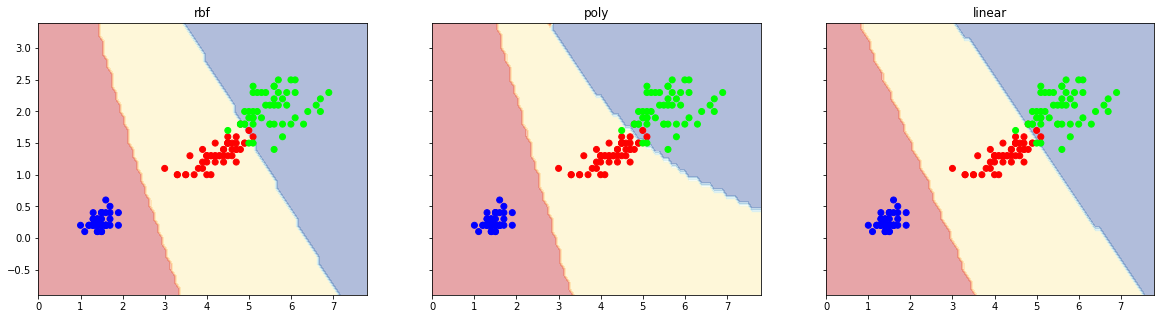

In [66]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20, 5))

for idx, clf, title in zip([0,1,2],[clf1, clf2, clf3], ['rbf', 'poly', 'linear']):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  axarr[idx].contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
  axarr[idx].scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.brg)
  axarr[idx].set_title(title)